### Task 2: Diffusion Maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from diffusion_maps import DiffusionMap
from dataset import Dataset
from diffusion_maps_plot import plot_diffusion_maps

#used for part 2, as a comparsion with PCA
import os, sys
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
file = parent + "/task1_1"
sys.path.insert(1, file)
from pca import pca

%load_ext autoreload
%autoreload 2

### Part 1
<font size="4"> Given:  a perodic data set  <br>
To Show: demonstrate the similarity of Diffusion Maps and Fourier analysis, compute five eigenfunctions ϕ_l associated to the largest eigenvalues λ_l, Plot the values of the eigenfunctions ϕl(xk) against tk.
 </font>

In [2]:
part = 1
nr_samples = 1000          
L = 5                    # L+1 largest eigenfunctions

# get periodic data
dataset = Dataset(nr_samples)
data, time = dataset.get_periodic_data()

d:\study-TUM\23ss\praktikum\ex3\Diffusion Maps\dataset.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


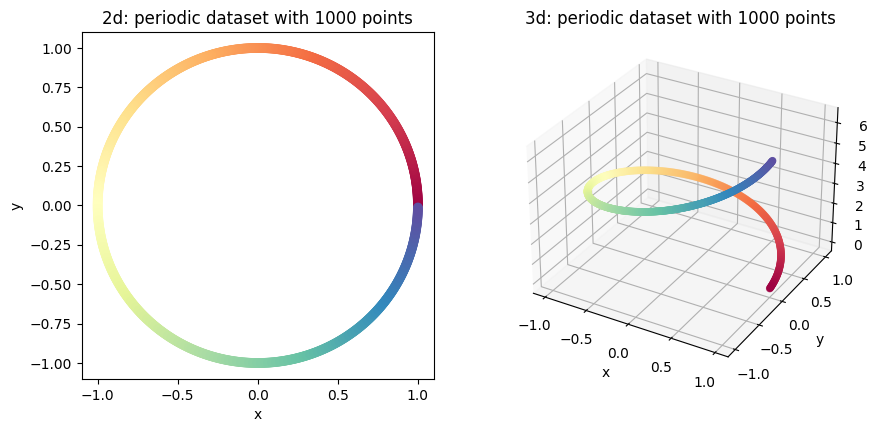

In [3]:
# Plot the periodic data with respect to time
dataset.plot_periodic_data(data, time)

Print 5 largest eigenvalues for the corresponding dataset: 
 [1.         0.87965296 0.87956515 0.59919324 0.59850672 0.31647998]


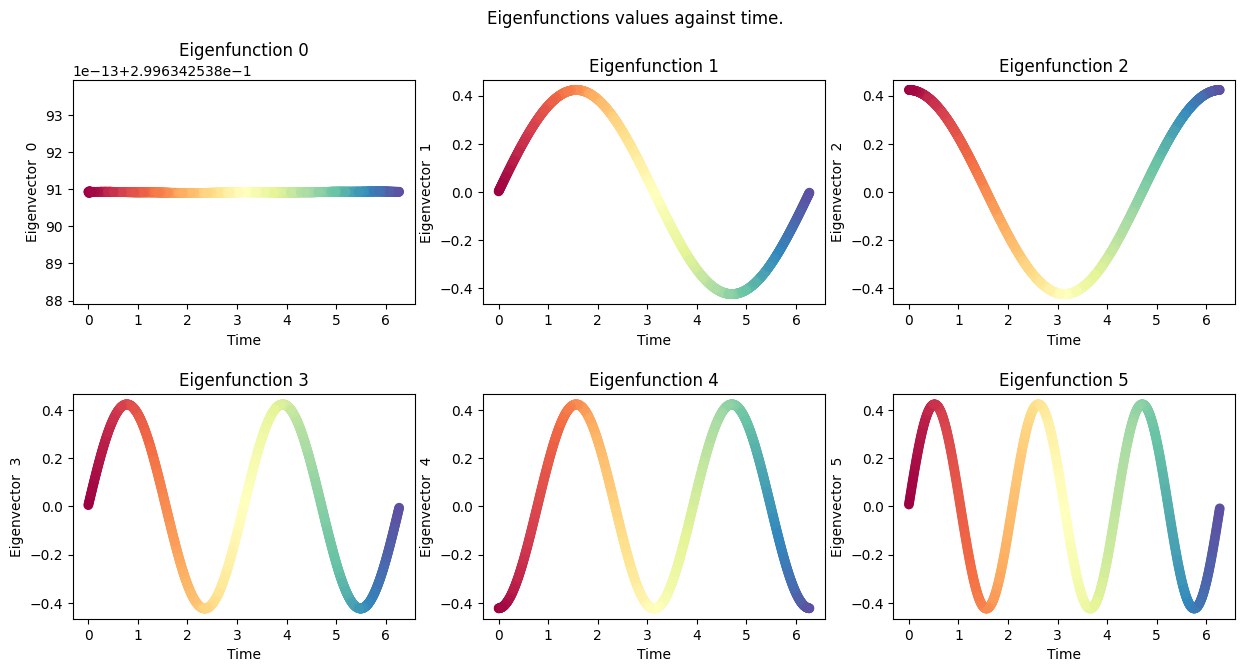

In [4]:
dmap = DiffusionMap()
phi_l, lambda_l  = dmap.diffusion_map_algorithm(data,L)

# Plot the eigenfunctions with respect to time
plot_diffusion_maps(part, nr_samples, L, phi_l, lambda_l ,time)

### Part 2
<font size="4"> Given:  a swiss roll data set  <br>
To Show: Use the diffusion map algorithm to obtain the first ten eigenfunctions
 </font>

In [40]:
part = 2
nr_samples = 5000          
L = 10                    # L+1 largest eigenfunctions

# get Swiss Roll data
dataset = Dataset(nr_samples)
data, time = dataset.get_swiss_roll()

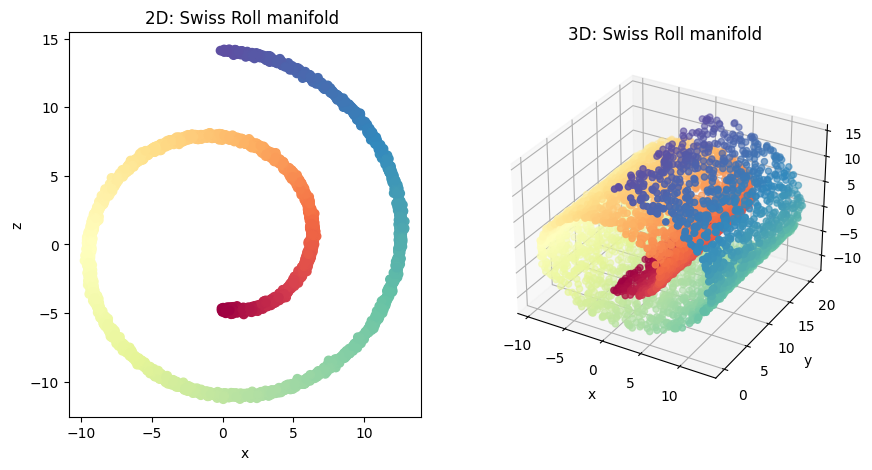

In [41]:
# Plot Swiss Roll data
dataset.plot_swiss_roll(data, time)

Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99986287 0.99945265 0.99877514 0.99779665 0.99763083
 0.9974461  0.99710588 0.99659169 0.99641808 0.99546466]


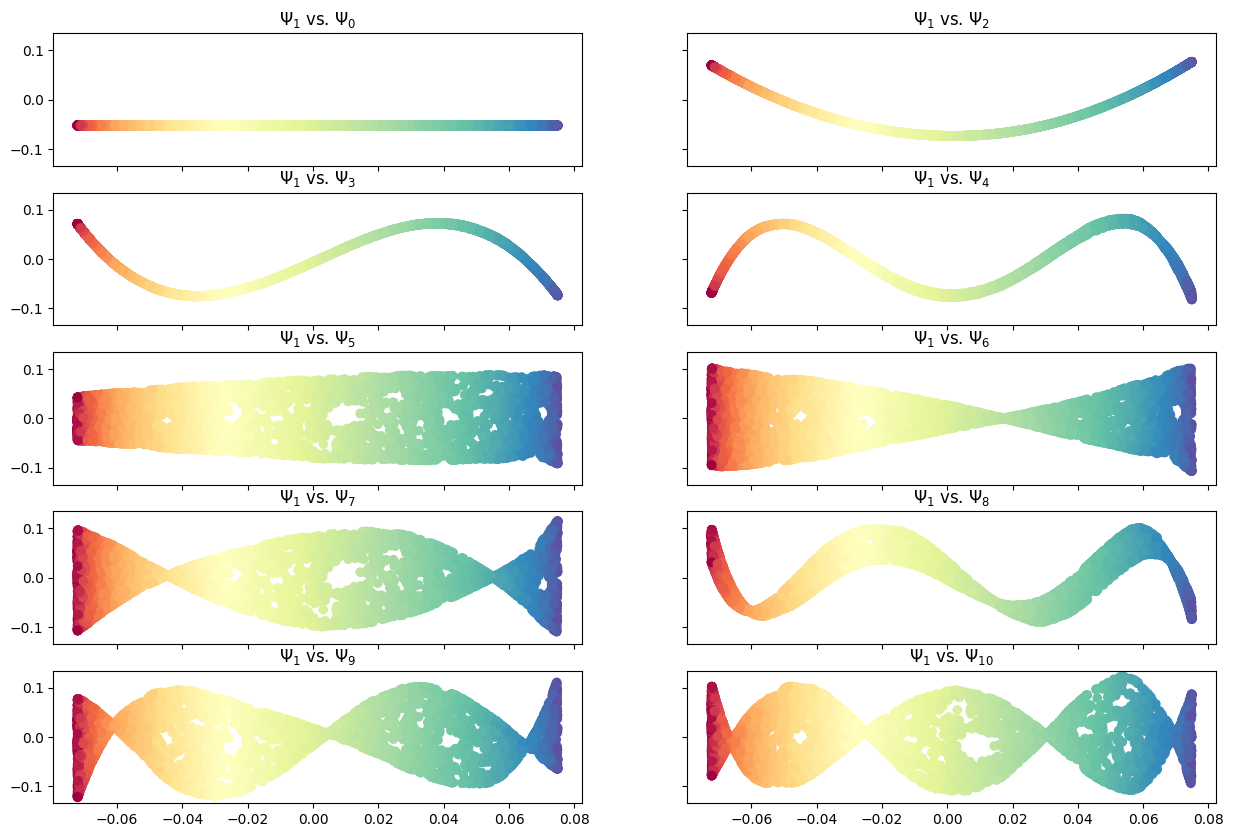

In [7]:
dmap = DiffusionMap()
phi_l, lambda_l  = dmap.diffusion_map_algorithm(data,L)

# Plot the eigenfunctions with respect to time
plot_diffusion_maps(part, nr_samples, L, phi_l,lambda_l ,time)

<font size="4"> Given:  a swiss roll data set  <br>
To Show: Compute the 3 principal components 
 </font>

<font size="4"> Given:  a swiss roll data set  <br>
To Show: Compute the 3 principal components 
 </font>

Engergy Loss for keeping 3 principal components: 


0.0

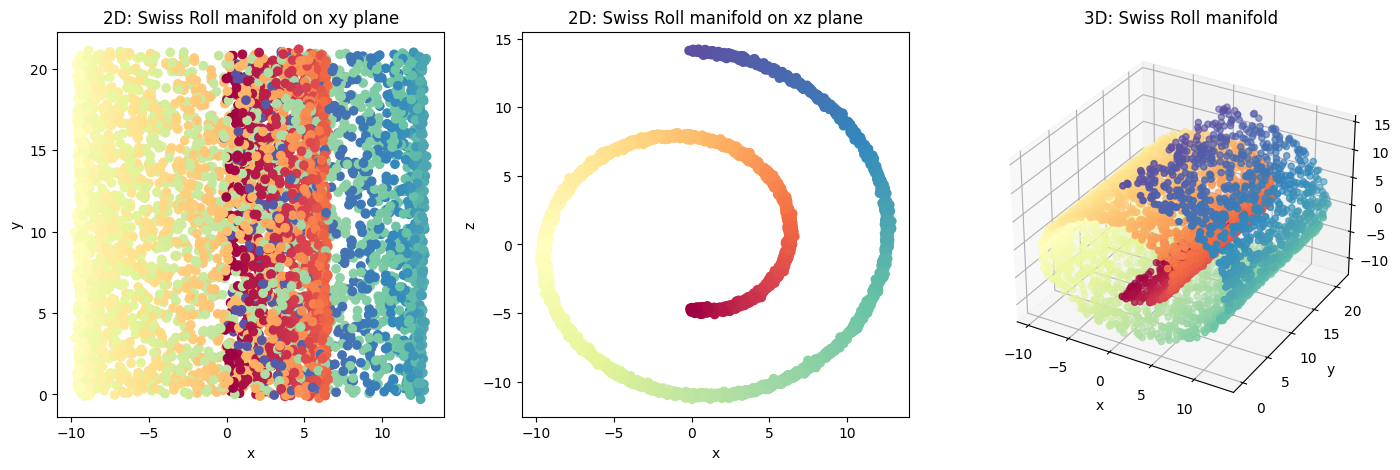

In [42]:
U, S, Vh, energy = pca(data)
S[3:, 3:] = 0

reconstruction = (U @ S @ Vh) + data.mean(axis=0)
dataset.plot_swiss_roll_PCA(reconstruction ,time,)

energy = np.sum(energy[:3])
energy_loss = (1 - energy)
print('Engergy Loss for keeping 3 principal components: ') 
energy_loss


<font size="4"> Given:  a swiss roll data set  <br>
To Show: Compute the 2 principal components 
 </font>

Engergy Loss for keeping 2 principal components: 


0.2848251260577074

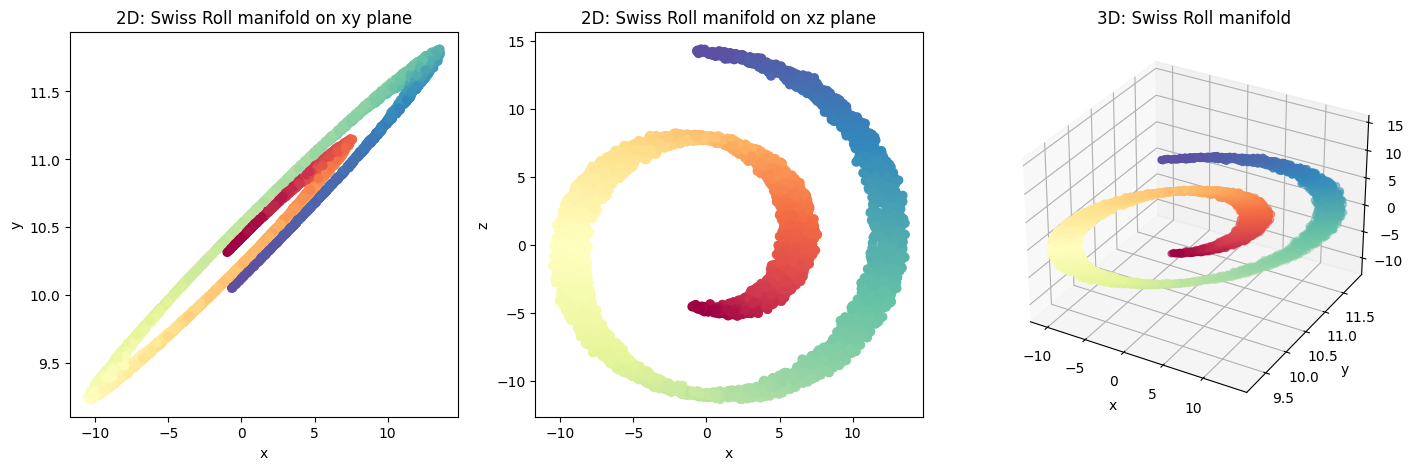

In [36]:
U, S, Vh, energy = pca(data)
S[2:, 2:] = 0

reconstruction = (U @ S @ Vh) + data.mean(axis=0)
dataset.plot_swiss_roll_PCA(reconstruction ,time)

energy = np.sum(energy[:2])
energy_loss = (1 - energy)
print('Engergy Loss for keeping 2 principal components: ') 
energy_loss

<font size="4"> Given:  a swiss roll data set  <br>
To Show: What happens if only 1000 data points are used?
 </font>

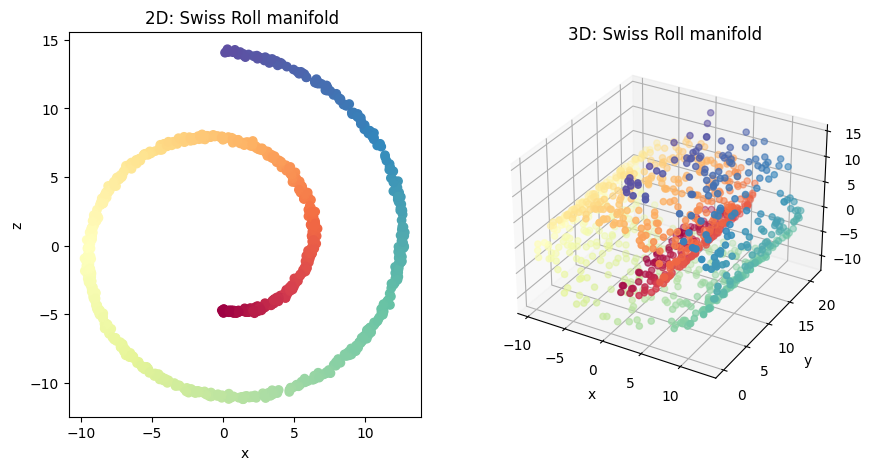

In [39]:
part = 2
nr_samples = 1000        
L = 10                    # L+1 largest eigenfunctions

# get periodic data
dataset = Dataset(nr_samples)
data, time = dataset.get_swiss_roll()
dataset.plot_swiss_roll(data, time)

Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99993136 0.99971475 0.9993704  0.99889626 0.99882028
 0.99867284 0.99839719 0.99830687 0.99812969 0.99787194]


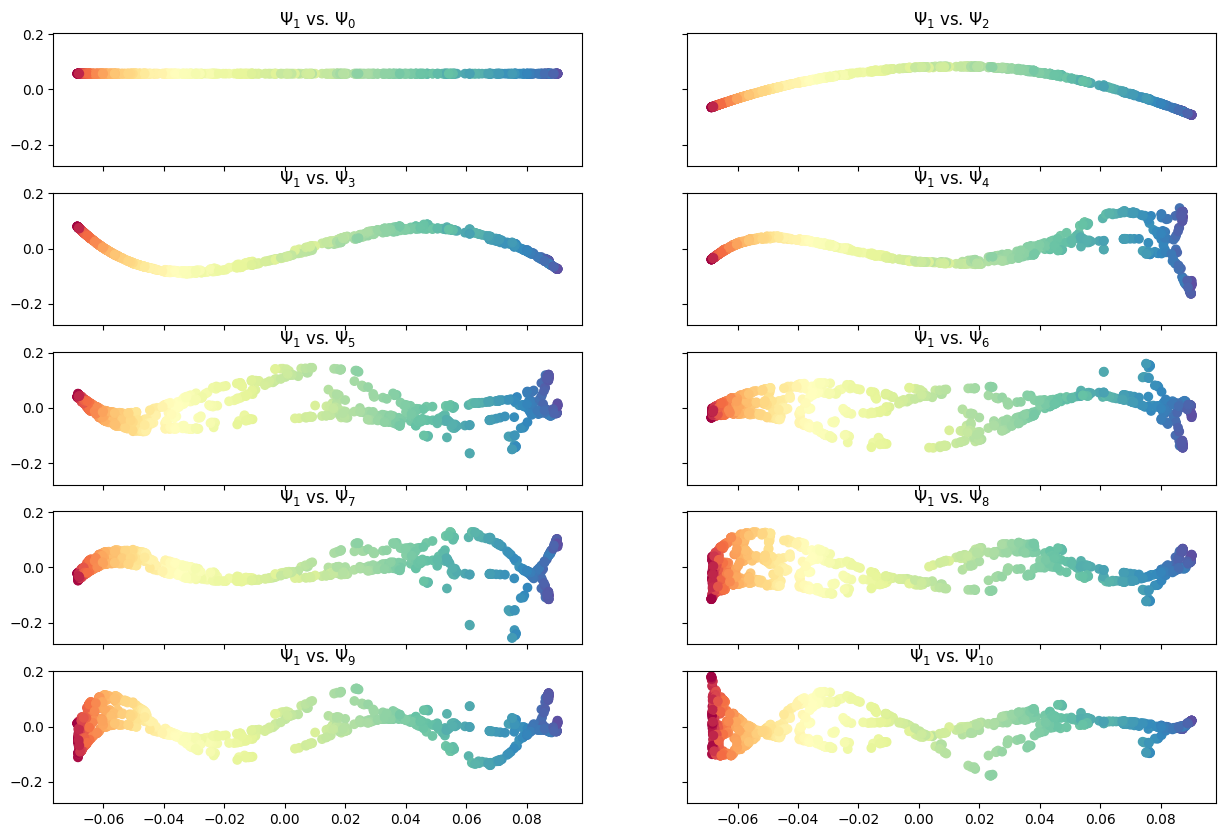

In [38]:
phi_l, lambda_l  = dmap.diffusion_map_algorithm(data,L)
# Plot the eigenfunctions with respect to time
plot_diffusion_maps(part, nr_samples, L, phi_l, lambda_l ,time)

Engergy Loss for keeping 3 principal components: 


0.0

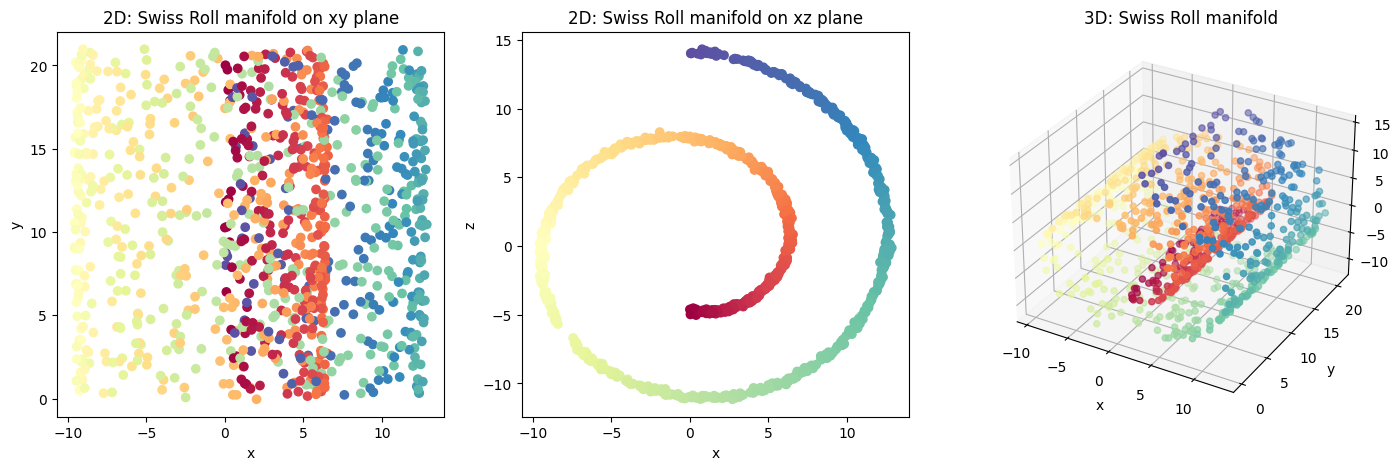

In [12]:
U, S, Vh, energy = pca(data)
S[3:, 3:] = 0

reconstruction = (U @ S @ Vh) + data.mean(axis=0)
dataset.plot_swiss_roll_PCA(reconstruction ,time,)

energy = np.sum(energy[:3])
energy_loss = (1 - energy)
print('Engergy Loss for keeping 3 principal components: ') 
energy_loss

Engergy Loss for keeping 2 principal components: 


0.27701613904757894

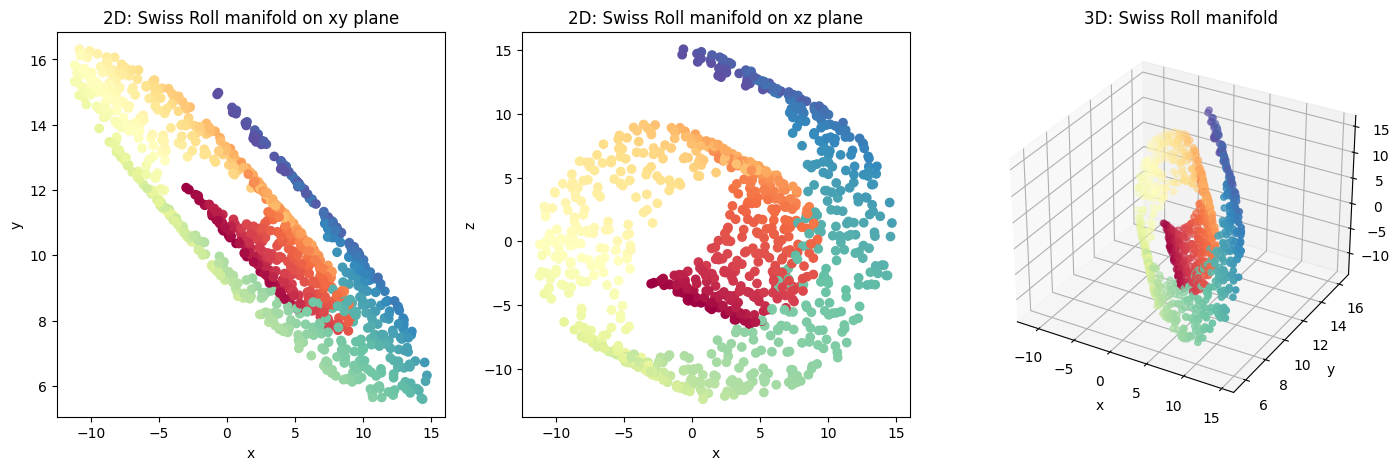

In [13]:
U, S, Vh, energy = pca(data)
S[2:, 2:] = 0

reconstruction = (U @ S @ Vh) + data.mean(axis=0)
dataset.plot_swiss_roll_PCA(reconstruction ,time)

energy = np.sum(energy[:2])
energy_loss = (1 - energy)
print('Engergy Loss for keeping 2 principal components: ') 
energy_loss

### Part 3
<font size="4"> Given: Pedestrian trajectory data in file data_DMAP_PCA_vadere.txt  <br>
To Show: How many eigenfuntions do we need to accurately represent the dataset, no intersection of the curves
 </font>

In [14]:
part = 3
L = 10   
data = np.loadtxt("data_DMAP_PCA_vadere.txt", dtype=float)

Text(0.5, 0.98, 'Show the trajectory of the first two pedestrians')

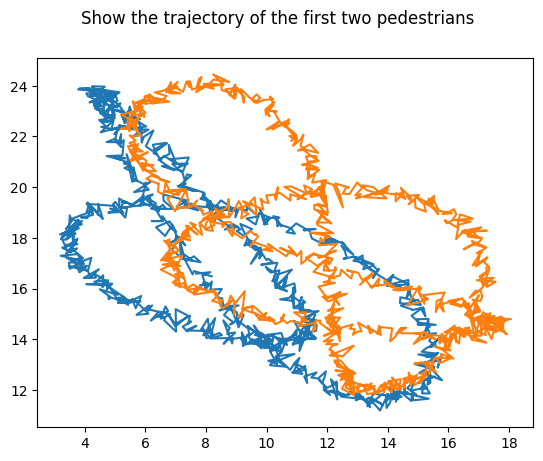

In [15]:
# Plot first 2 pedestrians
fig = plt.figure()
ax = plt.axes()
ax.plot(data[:,0], data[:,1]);   # plot pedestrian 1
ax.plot(data[:,2], data[:,3]);   # plot pedestrian 2
fig.suptitle(f"Show the trajectory of the first two pedestrians")

Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99993104 0.99992943 0.99972196 0.99971979 0.99938493
 0.9993588  0.99889581 0.99887324 0.99826891 0.99824373]


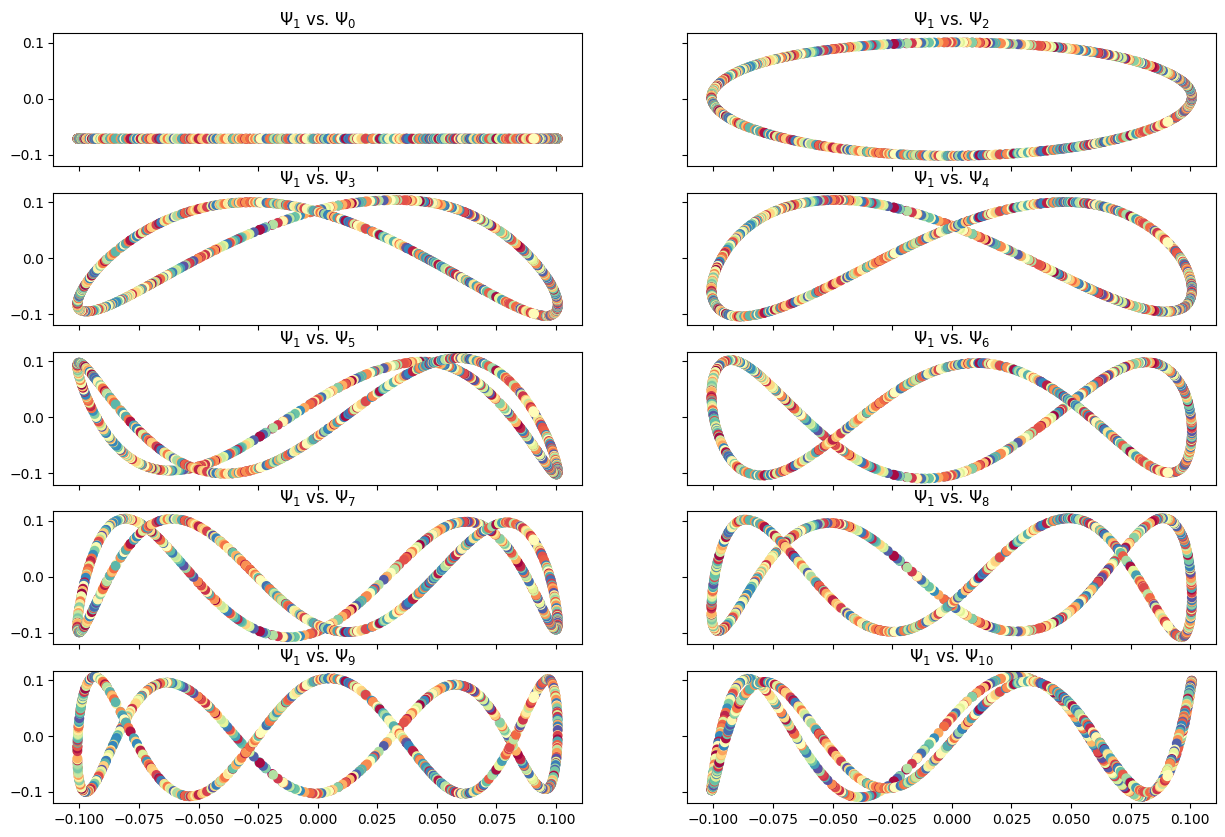

<Figure size 1000x450 with 0 Axes>

In [16]:
dmap = DiffusionMap()
phi_l, lambda_l = dmap.diffusion_map_algorithm(data,L)
part=3
plot_diffusion_maps(part, nr_samples, L, phi_l, lambda_l ,time)

### Part4 Bonus: Using Data fold to calculate diffusion maps for swiss-roll Data set

In [29]:
part = 4
nr_samples = 5000         
L = 10                    # L+1 largest eigenfunctions

# get periodic data
dataset = Dataset(nr_samples)
data, time = dataset.get_swiss_roll()


Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99989606 0.99958571 0.99904291 0.99833267 0.99832411
 0.99797992 0.9976859  0.99737502 0.99719375]


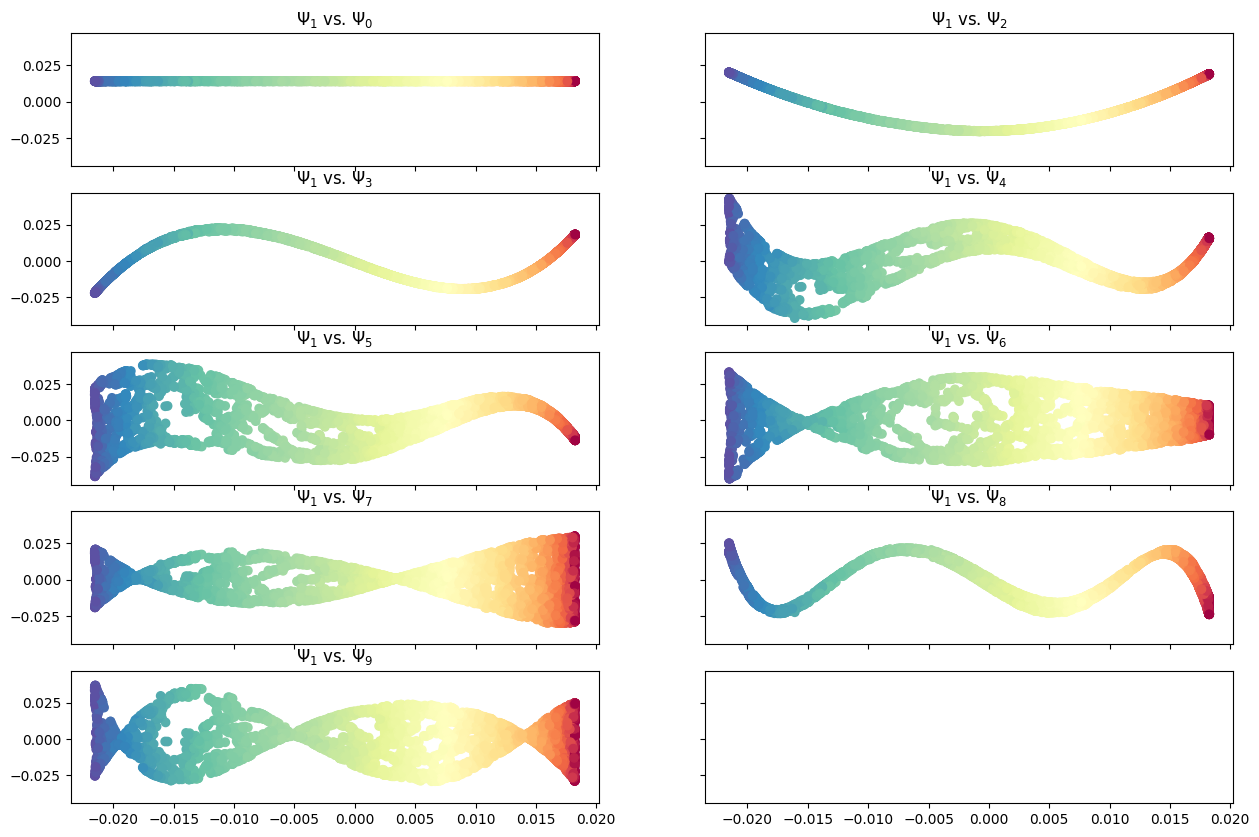

In [30]:
dmap = DiffusionMap()
phi_l, lambda_l = dmap.diffusion_map_datafold_bonus(L,data)
plot_diffusion_maps(part, nr_samples, L, phi_l, lambda_l ,time)